**Financial Data Analysis**

**Step 1- Import Libraries**

In [184]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

**Step 2- Load Finanial Statement Data**

In [187]:
Income_Sheet = pd.read_excel("C:\\Users\\Golu Juhi\\Downloads\\Finance Data.xlsx",sheet_name = 'IS')
Balance_Sheet = pd.read_excel("C:\\Users\\Golu Juhi\\Downloads\\Finance Data.xlsx",sheet_name = 'BS')
CashFlow_Sheet = pd.read_excel("C:\\Users\\Golu Juhi\\Downloads\\Finance Data.xlsx",sheet_name = 'CS')

**Step 3-Checking,Loading and handling Data**

**Income Statement**

In [190]:
Income_Sheet.head()

,Year,Date,Gross Profit,EBITDA,Depreciation,Amortization,EBIT,EBT,Taxes,Revenue,Total Revenue,Cost of Good Sold,Total Cost of Good Sold,Operating Expenses,Total Operating Expensese
0,2021,31/12/2021,30000.0,12000.0,9000.0,9000.0,-6000.0,-12000.0,0.0,[Segment 1],10000.0,[Cost 1],4000.0,Rent,6000.0
1,2021,31/12/2021,30000.0,12000.0,9000.0,9000.0,-6000.0,-12000.0,0.0,[Segment 1],10000.0,[Cost 1],4000.0,Utility,6000.0
2,2021,31/12/2021,30000.0,12000.0,9000.0,9000.0,-6000.0,-12000.0,0.0,[Segment 1],10000.0,[Cost 1],4000.0,Staff Cost,4000.0
3,2021,31/12/2021,30000.0,12000.0,9000.0,9000.0,-6000.0,-12000.0,0.0,[Segment 1],10000.0,[Cost 1],4000.0,Other Operating Expenses,2000.0
4,2021,31/12/2021,30000.0,12000.0,9000.0,9000.0,-6000.0,-12000.0,0.0,[Segment 1],10000.0,[Cost 2],6000.0,Rent,6000.0


In [191]:
Income_Sheet.shape

(448, 15)

In [192]:
Income_Sheet.describe()

,Year,Gross Profit,EBITDA,Depreciation,Amortization,EBIT,EBT,Taxes,Total Revenue,Total Cost of Good Sold,Total Operating Expensese
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,2027.500000,112211.182745,61751.295918,10205.372934,10205.372934,41340.550049,34223.553650,9595.252346,37427.537105,18749.482838,12614.971707
std,4.035635,64606.788940,39556.984989,5007.280446,5007.280446,47518.251170,50297.339791,11715.797972,21510.559158,11560.720051,10233.135923
min,2021.000000,30000.000000,12000.000000,1534.270912,1534.270912,-6600.000000,-12600.000000,0.000000,10000.000000,4000.000000,2000.000000
25%,2024.000000,60000.000000,31000.000000,5467.481953,5467.481953,-1000.000000,-7000.000000,250.000000,20000.000000,9800.000000,6000.000000
50%,2027.500000,98096.437500,52312.387500,13188.222222,13188.222222,24813.767694,13700.285266,3425.071317,32698.812500,15980.428750,7600.000000
75%,2031.000000,159601.192828,89540.874741,13837.013694,13837.013694,78605.910836,73311.339114,18327.834779,53200.397609,25293.319472,16386.673207
max,2034.000000,242733.464142,143754.540371,16000.000000,16000.000000,139168.927142,139168.927142,34792.231786,80911.154714,48546.692828,48546.692828


In [193]:
Income_Sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       448 non-null    int64  
 1   Date                       448 non-null    object 
 2   Gross Profit               448 non-null    float64
 3   EBITDA                     448 non-null    float64
 4   Depreciation               448 non-null    float64
 5   Amortization               448 non-null    float64
 6   EBIT                       448 non-null    float64
 7   EBT                        448 non-null    float64
 8   Taxes                      448 non-null    float64
 9   Revenue                    448 non-null    object 
 10  Total Revenue              448 non-null    float64
 11  Cost of Good Sold          448 non-null    object 
 12  Total Cost of Good Sold    448 non-null    float64
 13  Operating Expenses         448 non-null    object 

**Data Cleaning in Income Statement**

In [196]:
Income_Sheet.isnull()

,Year,Date,Gross Profit,EBITDA,Depreciation,Amortization,EBIT,EBT,Taxes,Revenue,Total Revenue,Cost of Good Sold,Total Cost of Good Sold,Operating Expenses,Total Operating Expensese
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
444,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
445,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
446,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [199]:
Income_Sheet.isnull().sum()

Year                         0
Date                         0
Gross Profit                 0
EBITDA                       0
Depreciation                 0
Amortization                 0
EBIT                         0
EBT                          0
Taxes                        0
Revenue                      0
Total Revenue                0
Cost of Good Sold            0
Total Cost of Good Sold      0
Operating Expenses           0
Total Operating Expensese    0
dtype: int64

In [202]:
#Change the data type in Date Column
Income_Sheet['Date'] = pd.to_datetime
(Income_Sheet['Date'])

0      <function to_datetime at 0x0000025FF5688040>
1      <function to_datetime at 0x0000025FF5688040>
2      <function to_datetime at 0x0000025FF5688040>
3      <function to_datetime at 0x0000025FF5688040>
4      <function to_datetime at 0x0000025FF5688040>
                           ...                     
443    <function to_datetime at 0x0000025FF5688040>
444    <function to_datetime at 0x0000025FF5688040>
445    <function to_datetime at 0x0000025FF5688040>
446    <function to_datetime at 0x0000025FF5688040>
447    <function to_datetime at 0x0000025FF5688040>
Name: Date, Length: 448, dtype: object

In [205]:
Income_Sheet['Date'].astype

<bound method NDFrame.astype of 0      <function to_datetime at 0x0000025FF5688040>
1      <function to_datetime at 0x0000025FF5688040>
2      <function to_datetime at 0x0000025FF5688040>
3      <function to_datetime at 0x0000025FF5688040>
4      <function to_datetime at 0x0000025FF5688040>
                           ...                     
443    <function to_datetime at 0x0000025FF5688040>
444    <function to_datetime at 0x0000025FF5688040>
445    <function to_datetime at 0x0000025FF5688040>
446    <function to_datetime at 0x0000025FF5688040>
447    <function to_datetime at 0x0000025FF5688040>
Name: Date, Length: 448, dtype: object>

**Balance Sheet**

In [209]:
Balance_Sheet.head()

,Year,Date,Total Current Assets,Total Non-Current Assets,Total Assets,Total Current Liabilities,Long-Term Loan/Non-Current liailities,Total Liabilities,Total Liabilities and Shareholders Equity,Current Assest,Non-Current Assest,Current Liabilities,Shareholders Equity
0,2021,31/12/2021,-91498.630137,182000.0,90501.369863,2501.369863,50000.0,52501.369863,90501.369863,Cash,"Tangible Assets, Gross",Accounts Payable,Equity Balance
1,2021,31/12/2021,-91498.630137,182000.0,90501.369863,2501.369863,50000.0,52501.369863,90501.369863,Cash,"Tangible Assets, Gross",Accounts Payable,Retained Earnings
2,2021,31/12/2021,-91498.630137,182000.0,90501.369863,2501.369863,50000.0,52501.369863,90501.369863,Cash,"Tangible Assets, Gross",Accrued Liabilities,Equity Balance
3,2021,31/12/2021,-91498.630137,182000.0,90501.369863,2501.369863,50000.0,52501.369863,90501.369863,Cash,"Tangible Assets, Gross",Accrued Liabilities,Retained Earnings
4,2021,31/12/2021,-91498.630137,182000.0,90501.369863,2501.369863,50000.0,52501.369863,90501.369863,Cash,"Tangible Assets, Gross",Other Current Liabilities,Equity Balance


In [211]:
Balance_Sheet.shape

(1000, 13)

In [213]:
Balance_Sheet.describe()

,Year,Total Current Assets,Total Non-Current Assets,Total Assets,Total Current Liabilities,Long-Term Loan/Non-Current liailities,Total Liabilities,Total Liabilities and Shareholders Equity
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2025.720000,24286.918836,120589.211686,144876.130522,6343.875473,99497.588176,105841.463649,144876.130522
std,3.015077,104663.602976,53870.366768,57791.647011,2887.750943,49581.339407,50523.226723,57791.647011
min,2021.000000,-109872.602740,32603.690388,58327.397260,2501.369863,50000.000000,52501.369863,58327.397260
25%,2023.000000,-101680.547945,77807.335944,78319.452055,3607.671233,50000.000000,53607.671233,78319.452055
50%,2026.000000,70950.375375,122340.955556,177603.467969,6306.767123,82048.008012,92817.924096,177603.467969
75%,2028.000000,98981.569167,176000.000000,186063.346845,8279.826233,147610.564549,154847.935782,186063.346845
max,2031.000000,184600.411221,182000.000000,217204.101609,12259.033633,183825.052557,189298.477215,217204.101609


In [215]:
Balance_Sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       1000 non-null   int64  
 1   Date                                       1000 non-null   object 
 2   Total Current Assets                       1000 non-null   float64
 3   Total Non-Current Assets                   1000 non-null   float64
 4   Total Assets                               1000 non-null   float64
 5   Total Current Liabilities                  1000 non-null   float64
 6   Long-Term Loan/Non-Current liailities      1000 non-null   float64
 7   Total Liabilities                          1000 non-null   float64
 8   Total Liabilities and Shareholders Equity  1000 non-null   float64
 9   Current Assest                             1000 non-null   object 
 10  Non-Current Assest       

**Data Cleaning in Balance_Sheet**

In [218]:
Balance_Sheet.isnull()

,Year,Date,Total Current Assets,Total Non-Current Assets,Total Assets,Total Current Liabilities,Long-Term Loan/Non-Current liailities,Total Liabilities,Total Liabilities and Shareholders Equity,Current Assest,Non-Current Assest,Current Liabilities,Shareholders Equity
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [220]:
Balance_Sheet.isnull().sum()

Year                                         0
Date                                         0
Total Current Assets                         0
Total Non-Current Assets                     0
Total Assets                                 0
Total Current Liabilities                    0
Long-Term Loan/Non-Current liailities        0
Total Liabilities                            0
Total Liabilities and Shareholders Equity    0
Current Assest                               0
Non-Current Assest                           0
Current Liabilities                          0
Shareholders Equity                          0
dtype: int64

In [222]:
#Change the data type in Date column
Balance_Sheet['Date'] = pd.to_datetime
(Balance_Sheet['Date'])

0      <function to_datetime at 0x0000025FF5688040>
1      <function to_datetime at 0x0000025FF5688040>
2      <function to_datetime at 0x0000025FF5688040>
3      <function to_datetime at 0x0000025FF5688040>
4      <function to_datetime at 0x0000025FF5688040>
                           ...                     
995    <function to_datetime at 0x0000025FF5688040>
996    <function to_datetime at 0x0000025FF5688040>
997    <function to_datetime at 0x0000025FF5688040>
998    <function to_datetime at 0x0000025FF5688040>
999    <function to_datetime at 0x0000025FF5688040>
Name: Date, Length: 1000, dtype: object

**Cash Flow Statement**

In [225]:
CashFlow_Sheet.head()

,Year,Date,Net profit for the year,Operating Profit before Working Capital Changes,(Increase)/Decrease In Total Current Assets,Increase/(Decrease) In Total Current Liabilities,Net Cash Generated From Operating Activities,Net Cash Flow From/(Used In) Investing Activities,Net Cash (Used In)/From Financing Activities,Net Increase In Cash And Cash Equivalents,Adjustment,Change in working capital,Increase/Decrease Liailities,Cash flow from investing activities,Cash flow from financing activities
0,2021,31/12/2021,-12000.0,6000.0,-4909.589041,2501.369863,3591.780822,-200000.0,100000.0,-96408.219178,Depreciation,(Increase)/Decrease In Accounts Receivable,Increase/(Decrease) In Accounts Payable,Net CapEx on Tangible Assets,Increase/(Decrease) In Long-Term Loan
1,2021,31/12/2021,-12000.0,6000.0,-4909.589041,2501.369863,3591.780822,-200000.0,100000.0,-96408.219178,Depreciation,(Increase)/Decrease In Accounts Receivable,Increase/(Decrease) In Accounts Payable,Net CapEx on Tangible Assets,Increase/(Decrease) In Equity Balance
2,2021,31/12/2021,-12000.0,6000.0,-4909.589041,2501.369863,3591.780822,-200000.0,100000.0,-96408.219178,Depreciation,(Increase)/Decrease In Accounts Receivable,Increase/(Decrease) In Accounts Payable,Net Acquisition of Intangible Assets,Increase/(Decrease) In Long-Term Loan
3,2021,31/12/2021,-12000.0,6000.0,-4909.589041,2501.369863,3591.780822,-200000.0,100000.0,-96408.219178,Depreciation,(Increase)/Decrease In Accounts Receivable,Increase/(Decrease) In Accounts Payable,Net Acquisition of Intangible Assets,Increase/(Decrease) In Equity Balance
4,2021,31/12/2021,-12000.0,6000.0,-4909.589041,2501.369863,3591.780822,-200000.0,100000.0,-96408.219178,Depreciation,(Increase)/Decrease In Accounts Receivable,Increase/(Decrease) In Accrued Liabilities,Net CapEx on Tangible Assets,Increase/(Decrease) In Long-Term Loan


In [227]:
CashFlow_Sheet.shape

(1000, 15)

In [229]:
CashFlow_Sheet.size

15000

In [231]:
CashFlow_Sheet.describe()

,Year,Net profit for the year,Operating Profit before Working Capital Changes,(Increase)/Decrease In Total Current Assets,Increase/(Decrease) In Total Current Liabilities,Net Cash Generated From Operating Activities,Net Cash Flow From/(Used In) Investing Activities,Net Cash (Used In)/From Financing Activities,Net Increase In Cash And Cash Equivalents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2027.448000,23990.314151,44527.661081,-2818.680549,1280.231627,42989.212160,-24442.506906,5040.000000,23586.705253
std,4.006913,38123.781333,30279.986715,1291.758564,572.558472,29737.936123,49355.168031,52095.867854,57046.597081
min,2021.000000,-12600.000000,6000.000000,-5181.398067,418.082192,3591.780822,-200000.000000,-29417.695092,-96408.219178
25%,2024.000000,-9250.000000,22148.508600,-3917.881336,833.342466,21197.123288,-20000.000000,-23506.960673,-3002.876712
50%,2027.000000,6939.514721,34262.726943,-2372.602740,1046.027397,33245.451600,-8512.063618,-18783.837359,14248.438728
75%,2031.000000,54983.504336,65918.468241,-1693.808219,1684.745456,64000.732454,-5596.820000,0.000000,37585.940298
max,2034.000000,104376.695357,108962.308586,-981.917808,2501.369863,105949.345973,-3680.000000,153825.052557,171866.711842


In [233]:
CashFlow_Sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Year                                               1000 non-null   int64  
 1   Date                                               1000 non-null   object 
 2   Net profit for the year                            1000 non-null   float64
 3   Operating Profit before Working Capital Changes    1000 non-null   float64
 4   (Increase)/Decrease In Total Current Assets        1000 non-null   float64
 5   Increase/(Decrease) In Total Current Liabilities   1000 non-null   float64
 6   Net Cash Generated From Operating Activities       1000 non-null   float64
 7   Net Cash Flow From/(Used In) Investing Activities  1000 non-null   float64
 8   Net Cash (Used In)/From Financing Activities       1000 non-null   float64
 9   Net Incre

**Data Cleaning in CashFlow_Sheet**

In [236]:
CashFlow_Sheet.isnull()

,Year,Date,Net profit for the year,Operating Profit before Working Capital Changes,(Increase)/Decrease In Total Current Assets,Increase/(Decrease) In Total Current Liabilities,Net Cash Generated From Operating Activities,Net Cash Flow From/(Used In) Investing Activities,Net Cash (Used In)/From Financing Activities,Net Increase In Cash And Cash Equivalents,Adjustment,Change in working capital,Increase/Decrease Liailities,Cash flow from investing activities,Cash flow from financing activities
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [238]:
CashFlow_Sheet.isnull().sum()

Year                                                 0
Date                                                 0
Net profit for the year                              0
Operating Profit before Working Capital Changes      0
(Increase)/Decrease In Total Current Assets          0
Increase/(Decrease) In Total Current Liabilities     0
Net Cash Generated From Operating Activities         0
Net Cash Flow From/(Used In) Investing Activities    0
Net Cash (Used In)/From Financing Activities         0
Net Increase In Cash And Cash Equivalents            0
Adjustment                                           0
Change in working capital                            0
Increase/Decrease Liailities                         0
Cash flow from investing activities                  0
Cash flow from financing activities                  0
dtype: int64

In [240]:
#Change the datatype in date column
CashFlow_Sheet['Date'] = pd.to_datetime
(CashFlow_Sheet['Date'])

0      <function to_datetime at 0x0000025FF5688040>
1      <function to_datetime at 0x0000025FF5688040>
2      <function to_datetime at 0x0000025FF5688040>
3      <function to_datetime at 0x0000025FF5688040>
4      <function to_datetime at 0x0000025FF5688040>
                           ...                     
995    <function to_datetime at 0x0000025FF5688040>
996    <function to_datetime at 0x0000025FF5688040>
997    <function to_datetime at 0x0000025FF5688040>
998    <function to_datetime at 0x0000025FF5688040>
999    <function to_datetime at 0x0000025FF5688040>
Name: Date, Length: 1000, dtype: object

**Step 4- Calculate financial metrics ratio**

*Calculate various financial metrics and ratio to analyze the company financial performance.*

**Calculate Income Statement Metrics**

In [245]:
#Calculate Revenue Growth Rate
revenue_growth_rate = Income_Sheet['Total Revenue'].pct_change()

In [247]:
print(revenue_growth_rate)

0      NaN
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
443    0.0
444    0.0
445    0.0
446    0.0
447    0.0
Name: Total Revenue, Length: 448, dtype: float64


In [249]:
#Calculate gross margin ratio
gross_margin_ratio = Income_Sheet['Gross Profit']/Income_Sheet['Total Revenue']

In [251]:
print(gross_margin_ratio)

0      3.0
1      3.0
2      3.0
3      3.0
4      3.0
      ... 
443    3.0
444    3.0
445    3.0
446    3.0
447    3.0
Length: 448, dtype: float64


In [253]:
#Calculate Operatig Profit
Income_Sheet['Operating Profit'] = Income_Sheet['Gross Profit'] - Income_Sheet['Total Operating Expensese']

In [255]:
print(Income_Sheet['Operating Profit'])

0       24000.000000
1       24000.000000
2       26000.000000
3       28000.000000
4       24000.000000
           ...      
443    226551.233200
444    236733.464142
445    194186.771314
446    214483.464142
447    226551.233200
Name: Operating Profit, Length: 448, dtype: float64


In [257]:
#Calculate Operating profit margin Ratio
operating_profit_margin_ratio = Income_Sheet['Operating Profit'] / Income_Sheet['Total Revenue']

In [259]:
print(operating_profit_margin_ratio)

0      2.400000
1      2.400000
2      2.600000
3      2.800000
4      2.400000
         ...   
443    2.800000
444    2.925845
445    2.400000
446    2.650852
447    2.800000
Length: 448, dtype: float64


**Step 5- Analyze Balance Sheet Metrics**

*Analyze the company balance sheet to assess its financial position.*

**Calculate Balance Sheet Metrics**

In [264]:
#Calculate Current Rati
Current_Ratio = Balance_Sheet['Total Current Assets'] / Balance_Sheet['Total Current Liabilities']


In [266]:
print(Current_Ratio)

0     -36.579409
1     -36.579409
2     -36.579409
3     -36.579409
4     -36.579409
         ...    
995    15.058317
996    15.058317
997    15.058317
998    15.058317
999    15.058317
Length: 1000, dtype: float64


In [268]:
#Calculate the equity
Balance_Sheet['total_equity'] = Balance_Sheet['Total Assets'] - Balance_Sheet['Total Liabilities']

In [270]:
print(Balance_Sheet['total_equity'])

0       38000.000000
1       38000.000000
2       38000.000000
3       38000.000000
4       38000.000000
           ...      
995    148228.927085
996    148228.927085
997    148228.927085
998    148228.927085
999    148228.927085
Name: total_equity, Length: 1000, dtype: float64


In [272]:
Balance_Sheet['total_debt'] = Balance_Sheet['Long-Term Loan/Non-Current liailities'] / Balance_Sheet['Total Assets']


In [274]:
print(Balance_Sheet['total_debt'])

0      0.552478
1      0.552478
2      0.552478
3      0.552478
4      0.552478
         ...   
995    0.261119
996    0.261119
997    0.261119
998    0.261119
999    0.261119
Name: total_debt, Length: 1000, dtype: float64


In [276]:
#Calculate debt-to-equity-ratio
debt_to_equity_ratio = Balance_Sheet['total_debt']/Balance_Sheet['total_equity']

In [278]:
print(debt_to_equity_ratio)

0      0.000015
1      0.000015
2      0.000015
3      0.000015
4      0.000015
         ...   
995    0.000002
996    0.000002
997    0.000002
998    0.000002
999    0.000002
Length: 1000, dtype: float64


**Step 6- Analyze Cashflow Statement Metrics**

*Analyze the company cash flow statement to assess tis ability to generate cash.*

**Calculate Cash Flow Statement metrics**

In [283]:
#Calculate operating cash flow margin ratio
operating_Cashflow_margin_ratio = CashFlow_Sheet['Net Cash Generated From Operating Activities'] / Income_Sheet['Total Revenue']

In [285]:
print(operating_Cashflow_margin_ratio)

0      0.359178
1      0.359178
2      0.359178
3      0.359178
4      0.359178
         ...   
995         NaN
996         NaN
997         NaN
998         NaN
999         NaN
Length: 1000, dtype: float64


In [287]:
#Calculate free cash flow
free_cash_flow = CashFlow_Sheet['Net Cash Generated From Operating Activities'] / CashFlow_Sheet['Net Increase In Cash And Cash Equivalents']

In [289]:
print(free_cash_flow)

0     -0.037256
1     -0.037256
2     -0.037256
3     -0.037256
4     -0.037256
         ...   
995    1.139197
996    1.139197
997    1.139197
998    1.139197
999    1.139197
Length: 1000, dtype: float64


**Step 7- Visualize Financial Data**

**Visualize the fianacial data using various plots and charts.\
1- Line plots for revenue and profit geowth.\
2- Bar charts for expenses categories.\
3- Scatters plots for correlation analysis.**

**1.Line Plot: Revenue Growth\
A line plot can be used to show the growth of revenue over time.**

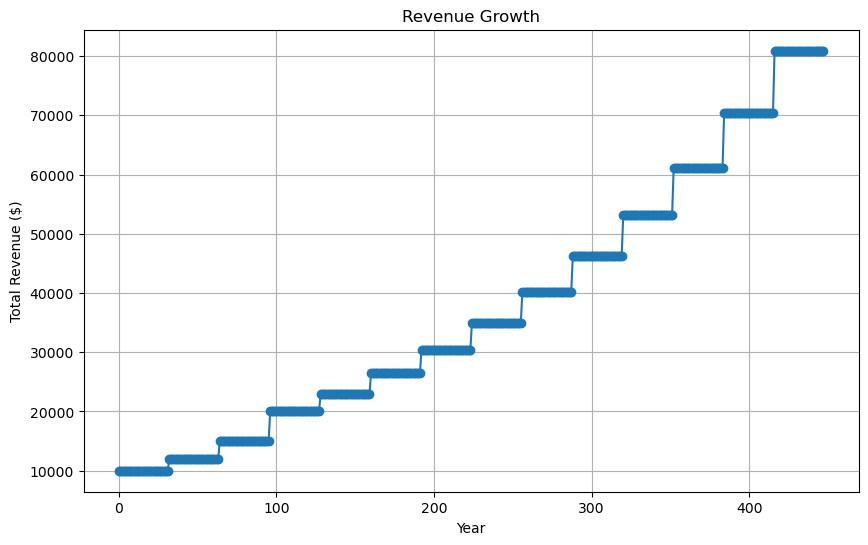

In [294]:
#Plot Revenue Growth 
plt.figure(figsize=(10,6))
plt.plot(Income_Sheet['Total Revenue'],marker='o')
plt.title('Revenue Growth')
plt.xlabel('Year')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.show()

In [295]:
years = pd.Series([2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034])
years_str = years.astype(str)
print(years_str)

0     2021
1     2022
2     2023
3     2024
4     2025
5     2026
6     2027
7     2028
8     2029
9     2030
10    2031
11    2032
12    2033
13    2034
dtype: object


**2. Bar Chart: Expenses Categories\
A bar chart can be used to compare different expenses category.**

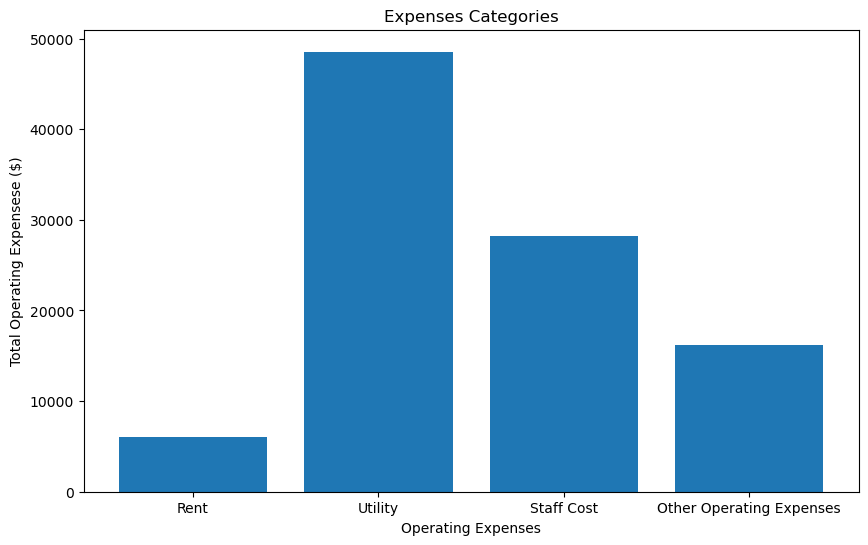

In [299]:
#plot Expenses categories
plt.figure(figsize=(10,6))
plt.bar(Income_Sheet['Operating Expenses'],Income_Sheet['Total Operating Expensese'])
plt.title('Expenses Categories')
plt.xlabel('Operating Expenses')
plt.ylabel('Total Operating Expensese ($)')
plt.show()

*Most of the Expenses Category in Utility (50000).*

In [301]:
#Calculate Net Income
Income_Sheet['Net_Income']  = Income_Sheet['Total Revenue'] - Income_Sheet['Total Cost of Good Sold']

In [302]:
print(Income_Sheet['Net_Income'])

0       6000.000000
1       6000.000000
2       6000.000000
3       6000.000000
4       4000.000000
           ...     
443    48546.692828
444    32364.461886
445    32364.461886
446    32364.461886
447    32364.461886
Name: Net_Income, Length: 448, dtype: float64


**3. Scatter Plot:Correlation Analysis\
A scatter plot can be used to analyze the correlation between two variables.**

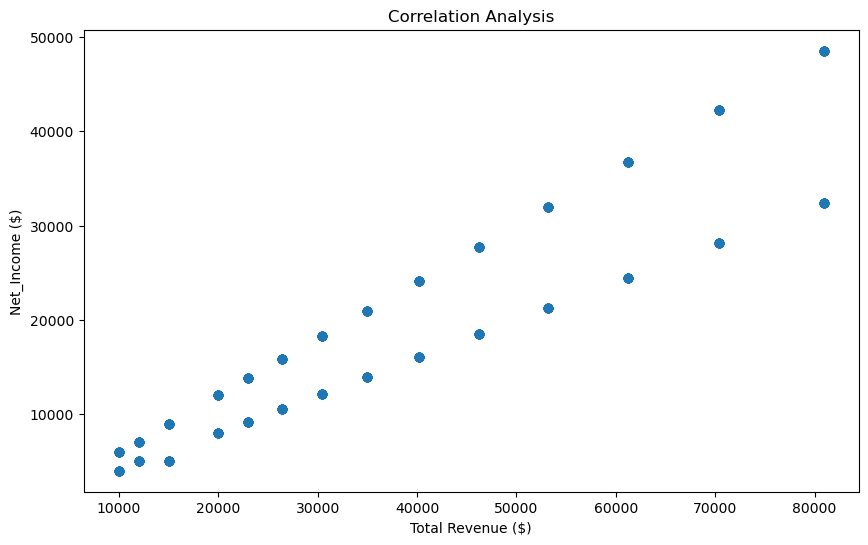

In [304]:
#Plot Correlation Analysis
plt.figure(figsize=(10,6))
plt.scatter(Income_Sheet['Total Revenue'],Income_Sheet['Net_Income'])
plt.title('Correlation Analysis')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Net_Income ($)')
plt.show()

**Create a Copy Data analyze**

In [305]:
data = Income_Sheet.copy()

In [309]:
data.head()

,Year,Date,Gross Profit,EBITDA,Depreciation,Amortization,EBIT,EBT,Taxes,Revenue,Total Revenue,Cost of Good Sold,Total Cost of Good Sold,Operating Expenses,Total Operating Expensese,Operating Profit,Net_Income
0,2021,<function to_datetime at 0x0000025FF5688040>,30000.0,12000.0,9000.0,9000.0,-6000.0,-12000.0,0.0,[Segment 1],10000.0,[Cost 1],4000.0,Rent,6000.0,24000.0,6000.0
1,2021,<function to_datetime at 0x0000025FF5688040>,30000.0,12000.0,9000.0,9000.0,-6000.0,-12000.0,0.0,[Segment 1],10000.0,[Cost 1],4000.0,Utility,6000.0,24000.0,6000.0
2,2021,<function to_datetime at 0x0000025FF5688040>,30000.0,12000.0,9000.0,9000.0,-6000.0,-12000.0,0.0,[Segment 1],10000.0,[Cost 1],4000.0,Staff Cost,4000.0,26000.0,6000.0
3,2021,<function to_datetime at 0x0000025FF5688040>,30000.0,12000.0,9000.0,9000.0,-6000.0,-12000.0,0.0,[Segment 1],10000.0,[Cost 1],4000.0,Other Operating Expenses,2000.0,28000.0,6000.0
4,2021,<function to_datetime at 0x0000025FF5688040>,30000.0,12000.0,9000.0,9000.0,-6000.0,-12000.0,0.0,[Segment 1],10000.0,[Cost 2],6000.0,Rent,6000.0,24000.0,4000.0


In [310]:
data.drop(['Year','Date','Revenue','Cost of Good Sold','Operating Expenses'],axis=1, inplace=True)

In [313]:
data.head()

,Gross Profit,EBITDA,Depreciation,Amortization,EBIT,EBT,Taxes,Total Revenue,Total Cost of Good Sold,Total Operating Expensese,Operating Profit,Net_Income
0,30000.0,12000.0,9000.0,9000.0,-6000.0,-12000.0,0.0,10000.0,4000.0,6000.0,24000.0,6000.0
1,30000.0,12000.0,9000.0,9000.0,-6000.0,-12000.0,0.0,10000.0,4000.0,6000.0,24000.0,6000.0
2,30000.0,12000.0,9000.0,9000.0,-6000.0,-12000.0,0.0,10000.0,4000.0,4000.0,26000.0,6000.0
3,30000.0,12000.0,9000.0,9000.0,-6000.0,-12000.0,0.0,10000.0,4000.0,2000.0,28000.0,6000.0
4,30000.0,12000.0,9000.0,9000.0,-6000.0,-12000.0,0.0,10000.0,6000.0,6000.0,24000.0,4000.0


In [316]:
data.corr()

,Gross Profit,EBITDA,Depreciation,Amortization,EBIT,EBT,Taxes,Total Revenue,Total Cost of Good Sold,Total Operating Expensese,Operating Profit,Net_Income
Gross Profit,1.000000,0.999636,-0.742813,-0.742813,0.988705,0.982173,0.962693,0.999993,0.927054,0.612330,0.990521,0.928034
EBITDA,0.999636,1.000000,-0.748383,-0.748383,0.990182,0.984026,0.966093,0.999628,0.926716,0.611403,0.990283,0.927696
Depreciation,-0.742813,-0.748383,1.000000,1.000000,-0.833750,-0.849041,-0.868795,-0.743058,-0.689561,-0.449202,-0.736753,-0.688892
Amortization,-0.742813,-0.748383,1.000000,1.000000,-0.833750,-0.849041,-0.868795,-0.743058,-0.689561,-0.449202,-0.736753,-0.688892
EBIT,0.988705,0.990182,-0.833750,-0.833750,1.000000,0.998098,0.987333,0.988750,0.916779,0.603638,0.979642,0.917454
EBT,0.982173,0.984026,-0.849041,-0.849041,0.998098,1.000000,0.994803,0.982297,0.911014,0.599277,0.973235,0.911248
Taxes,0.962693,0.966093,-0.868795,-0.868795,0.987333,0.994803,1.000000,0.962928,0.893371,0.585860,0.954197,0.892963
Total Revenue,0.999993,0.999628,-0.743058,-0.743058,0.988750,0.982297,0.962928,1.000000,0.927101,0.612325,0.990514,0.928000
Total Cost of Good Sold,0.927054,0.926716,-0.689561,-0.689561,0.916779,0.911014,0.893371,0.927101,1.000000,0.567663,0.918266,0.720704
Total Operating Expensese,0.612330,0.611403,-0.449202,-0.449202,0.603638,0.599277,0.585860,0.612325,0.567663,1.000000,0.497929,0.568263


array([[<Axes: title={'center': 'Gross Profit'}>,
        <Axes: title={'center': 'EBITDA'}>,
        <Axes: title={'center': 'Depreciation'}>],
       [<Axes: title={'center': 'Amortization'}>,
        <Axes: title={'center': 'EBIT'}>,
        <Axes: title={'center': 'EBT'}>],
       [<Axes: title={'center': 'Taxes'}>,
        <Axes: title={'center': 'Total Revenue'}>,
        <Axes: title={'center': 'Total Cost of Good Sold'}>],
       [<Axes: title={'center': 'Total Operating Expensese'}>,
        <Axes: title={'center': 'Operating Profit'}>,
        <Axes: title={'center': 'Net_Income'}>]], dtype=object)

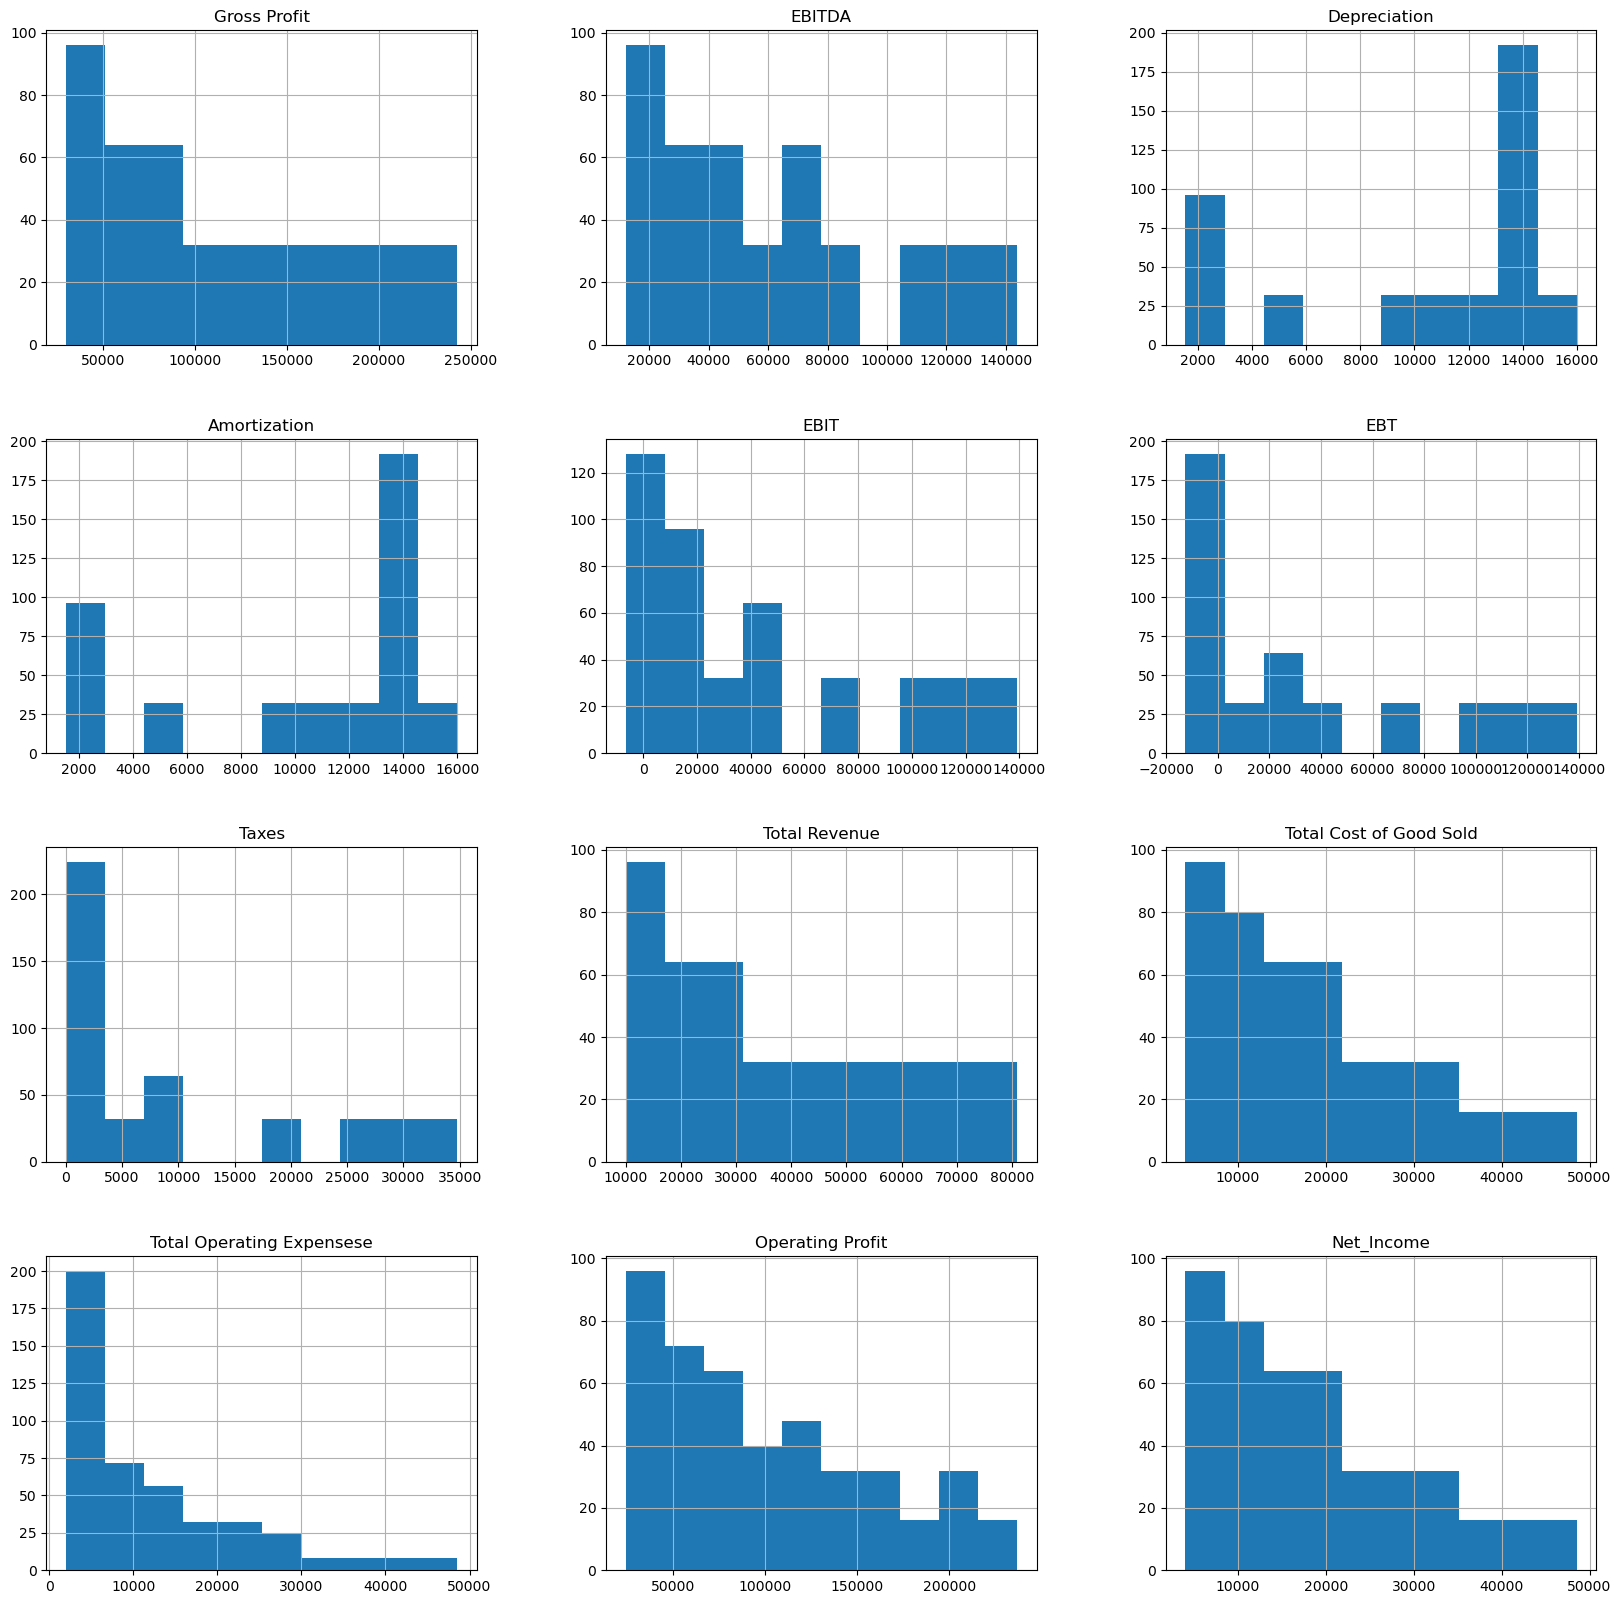

In [319]:
data.hist(figsize = (20,20))

<Axes: >

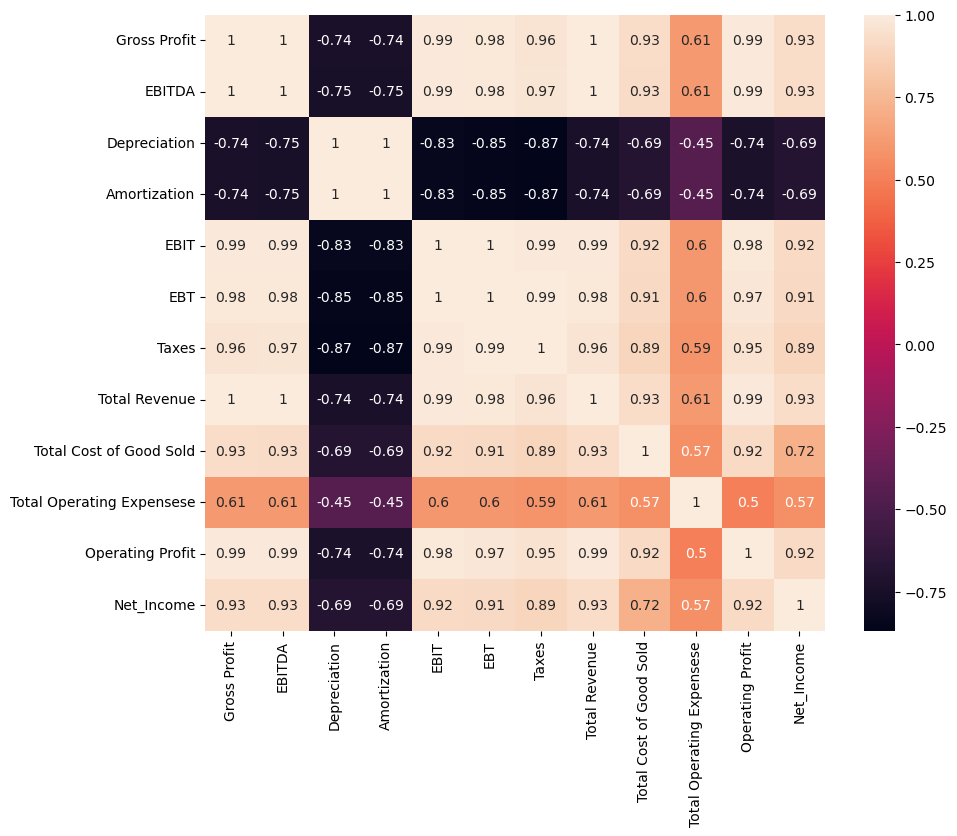

In [320]:
plt.figure(figsize =(10,8))
sns.heatmap(data.corr(), annot = True)

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Total Current Assets'}>,
        <Axes: title={'center': 'Total Non-Current Assets'}>],
       [<Axes: title={'center': 'Total Assets'}>,
        <Axes: title={'center': 'Total Current Liabilities'}>,
        <Axes: title={'center': 'Long-Term Loan/Non-Current liailities'}>],
       [<Axes: title={'center': 'Total Liabilities'}>,
        <Axes: title={'center': 'Total Liabilities and Shareholders Equity'}>,
        <Axes: title={'center': 'total_equity'}>],
       [<Axes: title={'center': 'total_debt'}>, <Axes: >, <Axes: >]],
      dtype=object)

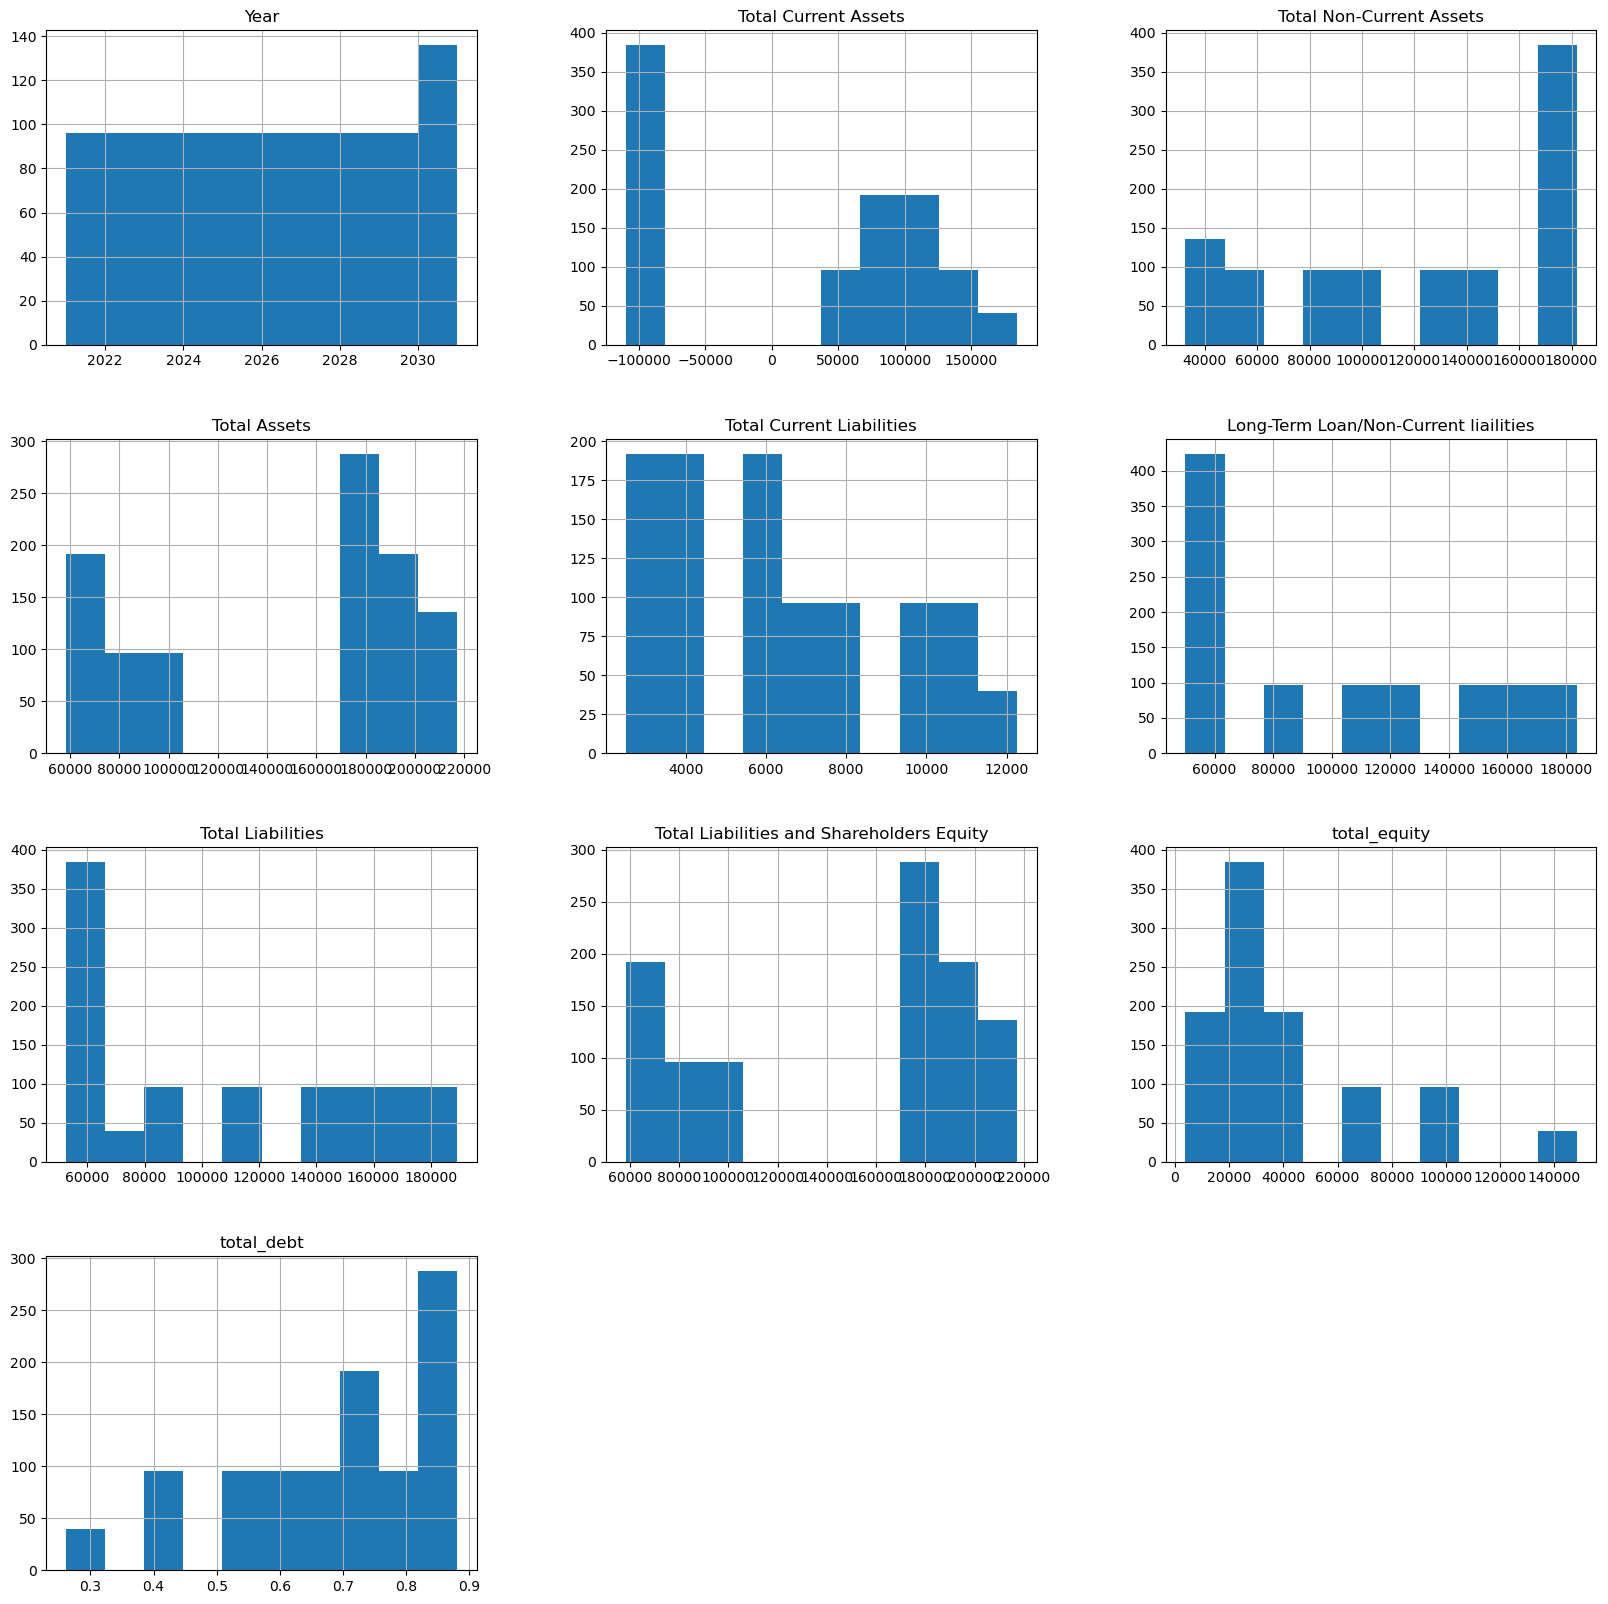

In [326]:
#Create a hist plot for balance sheet
Balance_Sheet.hist(figsize = (20,20))

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Net profit for the year'}>,
        <Axes: title={'center': 'Operating Profit before Working Capital Changes'}>],
       [<Axes: title={'center': '(Increase)/Decrease In Total Current Assets'}>,
        <Axes: title={'center': 'Increase/(Decrease) In Total Current Liabilities'}>,
        <Axes: title={'center': 'Net Cash Generated From Operating Activities'}>],
       [<Axes: title={'center': 'Net Cash Flow From/(Used In) Investing Activities'}>,
        <Axes: title={'center': 'Net Cash (Used In)/From Financing Activities'}>,
        <Axes: title={'center': 'Net Increase In Cash And Cash Equivalents'}>]],
      dtype=object)

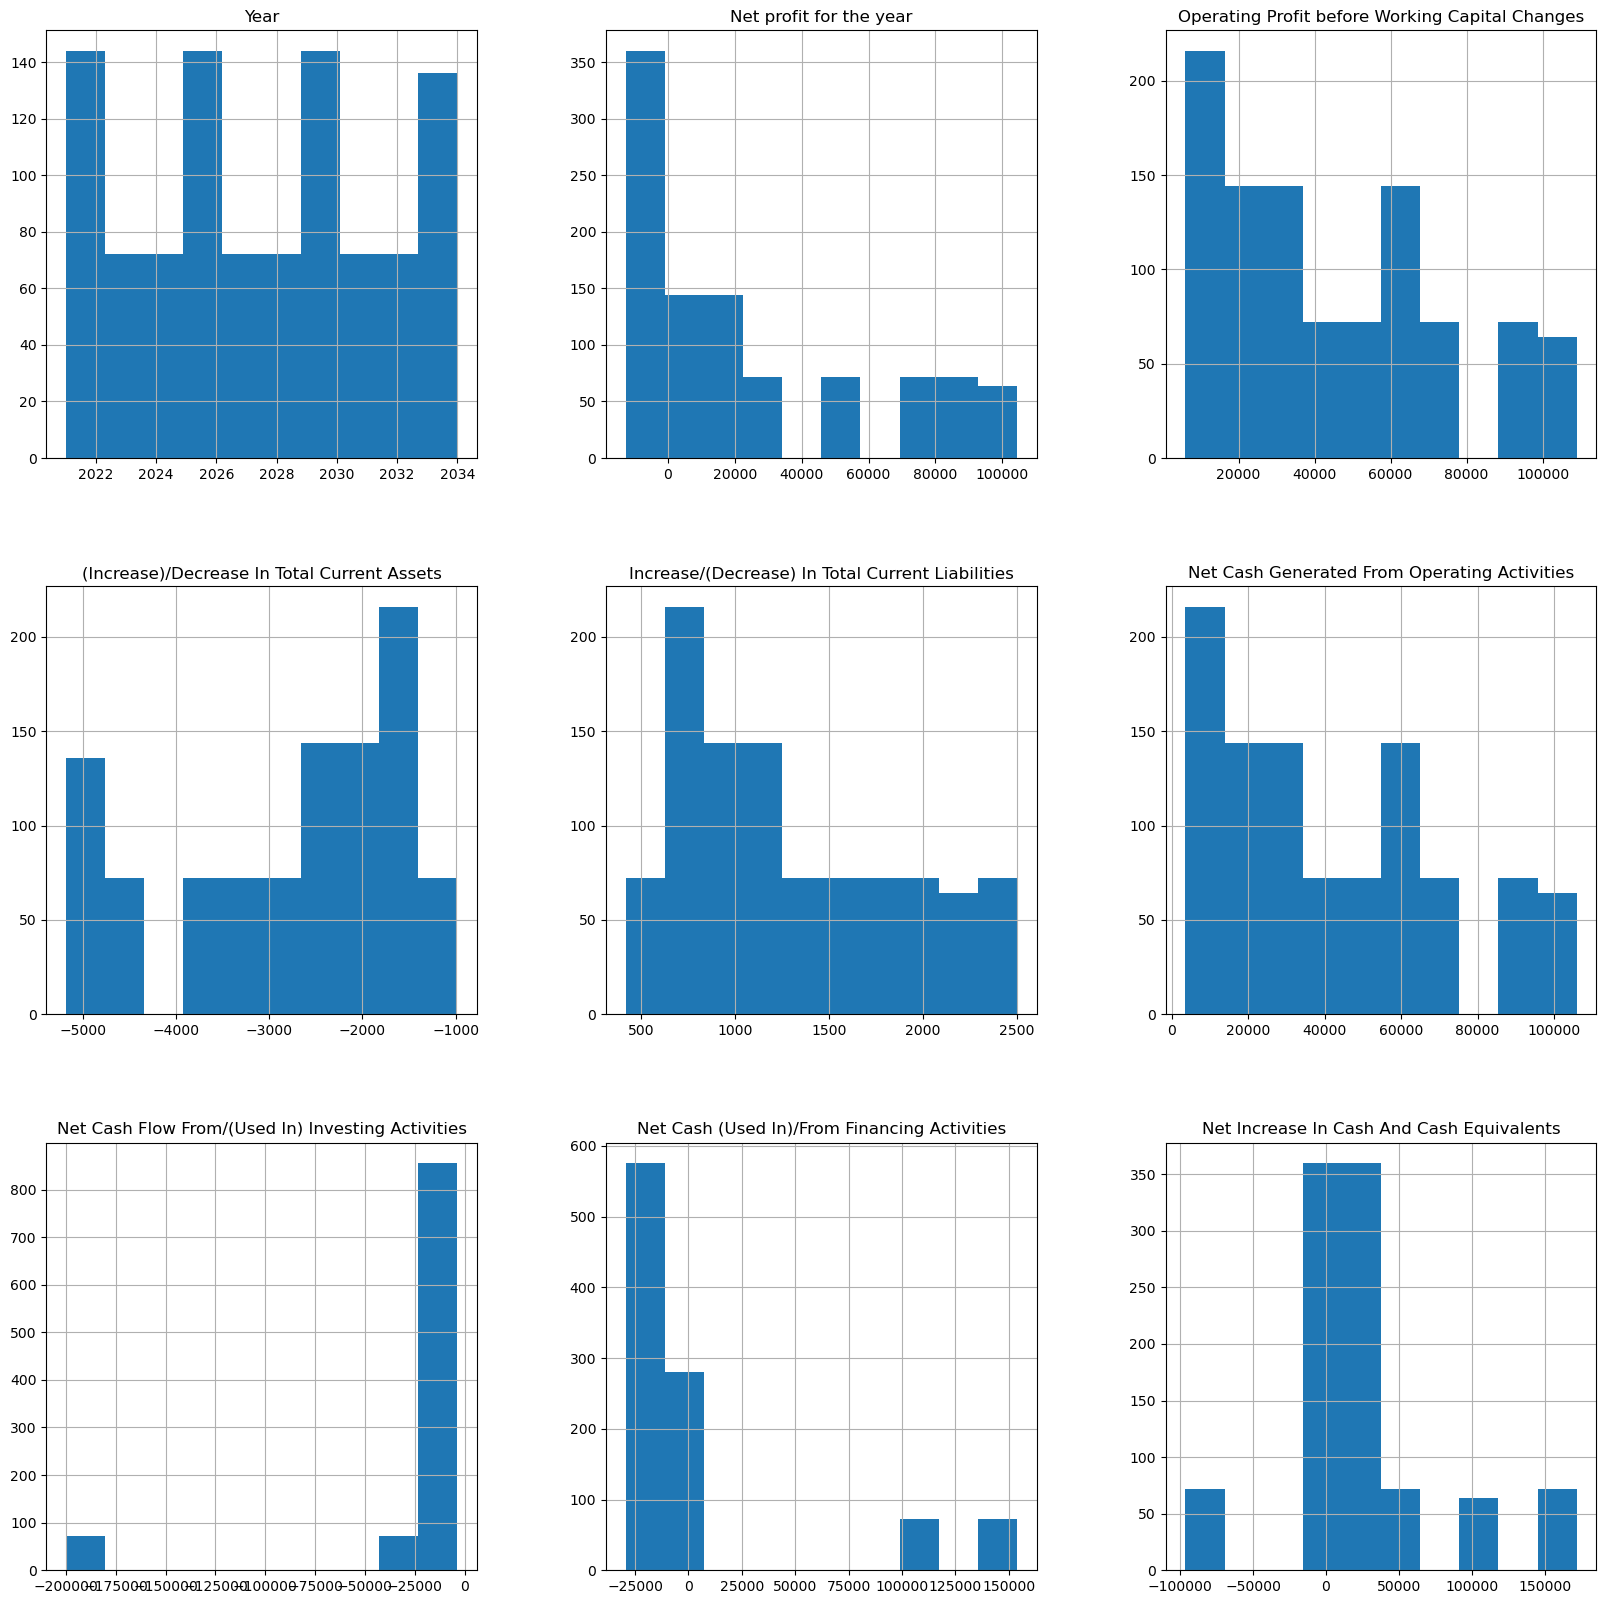

In [328]:
#Create a hist plot for cashflow sh
CashFlow_Sheet.hist(figsize = (20,20))